# Binary classification of the complete dataset


In [36]:
import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

import os

In [37]:
# Connection String

serverName = "sqlserver-pw.database.windows.net" 
databaseName = "db-ai"
username = "girls"
password = "Password?"

In [38]:
# Make the conncection to our Server

connection_string = f'DRIVER={{SQL Server}};SERVER='+serverName+';DATABASE='+databaseName+';UID='+username+';PWD='+ password

cnxn = pyodbc.connect(connection_string)
cursor = cnxn.cursor()

In [39]:
query = "SELECT  Canale, CodAgenzia,ClusterAgenzia, CodContratto,CategoriaCespite, Cespite, TipologiaUtenza,[DataTrasf.entr.], Anagrafica,SettoreMerceologico, ListinoProposto, [Soc.Vend.Prec.],ClusterSocVend,Localita, [Cod.ISTAT], Provincia,RegioneItaliana, Zona, ModoPagamento, RedditoTotale, Mese01,MesiBEP,MesiAttivi, UltimoReddito,BEP FROM try.DatiConsumi_ML "

In [40]:
df = pd.read_sql(query,cnxn)

C:\Users\IreneDeNevi\AppData\Local\Temp\ipykernel_45368\620203339.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,cnxn)


In [41]:
df.isnull().sum()

Canale                   0
CodAgenzia               0
ClusterAgenzia           0
CodContratto             0
CategoriaCespite         0
Cespite                  0
TipologiaUtenza          0
DataTrasf.entr.          0
Anagrafica               0
SettoreMerceologico      0
ListinoProposto          0
Soc.Vend.Prec.         232
ClusterSocVend           0
Localita                 0
Cod.ISTAT                0
Provincia                0
RegioneItaliana          0
Zona                     0
ModoPagamento            0
RedditoTotale            0
Mese01                   0
MesiBEP                  0
MesiAttivi               0
UltimoReddito            0
BEP                      0
dtype: int64

In [42]:
#Data Cleaning and Formatting

df.dropna(subset=["Soc.Vend.Prec."], inplace=True)
int_columns = ["Canale", "CodAgenzia", "ClusterAgenzia", "CodContratto", "Cespite",  "Anagrafica", "SettoreMerceologico", "ListinoProposto", "Soc.Vend.Prec.", "ClusterSocVend", "Localita", "Provincia", "RegioneItaliana", "Zona", "ModoPagamento", "UltimoReddito"]
df[int_columns] = df[int_columns].astype(int)
df['Year_Trasf.entr.'] = pd.to_datetime(df['DataTrasf.entr.']).dt.year
df['Month_Trasf.entr.'] = pd.to_datetime(df['DataTrasf.entr.']).dt.month
df['Day_Trasf.entr.'] = pd.to_datetime(df['DataTrasf.entr.']).dt.day
df.drop(['DataTrasf.entr.'],axis=1,inplace=True) 


In [43]:
y = df['BEP']               #Target
X = df.drop('BEP', axis=1)  #Features

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42) 

In [45]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [46]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

accuracy, precision, recall,confusion_matrices = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)     #Accuracy shows how often a classification ML model is correct overall. ->  accuracy answers the question: how often the model is right?
    precision[key] = precision_score(predictions, y_test)   #Precision shows how often an ML model is correct when predicting the target class
    recall[key] = recall_score(predictions, y_test)         #Recall shows whether an ML model can find all objects of the target class
    # Confusion Matrix
    confusion_matrices[key] = confusion_matrix(predictions, y_test)


    # Print the model and its confusion matrix
    print(f"Model: {key}")
    print("Confusion Matrix:")
    print(confusion_matrices[key])
    print("\n")


C:\Users\IreneDeNevi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Confusion Matrix:
[[84826     8]
 [   86 33762]]




C:\Users\IreneDeNevi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model: Support Vector Machines
Confusion Matrix:
[[84829     8]
 [   83 33762]]


Model: Decision Trees
Confusion Matrix:
[[84878     0]
 [   34 33770]]


Model: Random Forest
Confusion Matrix:
[[84878     0]
 [   34 33770]]


Model: Naive Bayes
Confusion Matrix:
[[55535     0]
 [29377 33770]]


Model: K-Nearest Neighbor
Confusion Matrix:
[[82949  2383]
 [ 1963 31387]]




In [48]:
#Store all the evaluation scores in columns

df_model = pd.DataFrame(index=models.keys(), columns=['Model','Accuracy', 'Precision', 'Recall','ConfusionMatrix'])
df_model['Model'] = models
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['ConfusionMatrix'] = confusion_matrices.values()


df_model

,Model,Accuracy,Precision,Recall,ConfusionMatrix
Logistic Regression,LogisticRegression(),0.999208,0.999763,0.997459,"[[84826, 8], [86, 33762]]"
Support Vector Machines,LinearSVC(),0.999233,0.999763,0.997548,"[[84829, 8], [83, 33762]]"
Decision Trees,DecisionTreeClassifier(),0.999714,1.000000,0.998994,"[[84878, 0], [34, 33770]]"
Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.999714,1.000000,0.998994,"[[84878, 0], [34, 33770]]"
Naive Bayes,GaussianNB(),0.752473,1.000000,0.534784,"[[55535, 0], [29377, 33770]]"
K-Nearest Neighbor,KNeighborsClassifier(),0.963381,0.929434,0.941139,"[[82949, 2383], [1963, 31387]]"


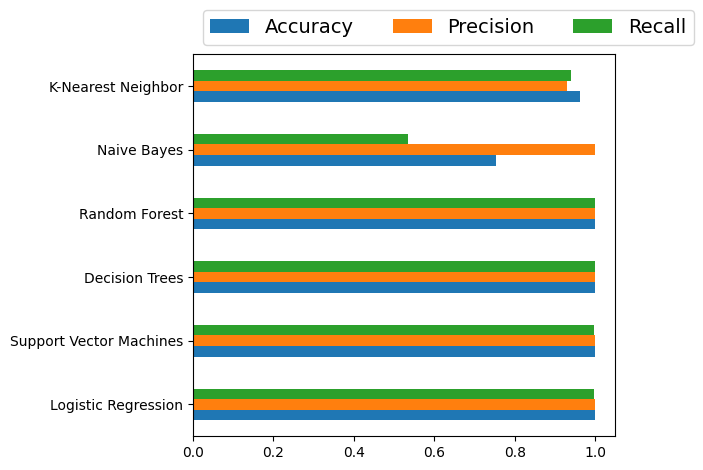

In [49]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

In [50]:
# Get the current working directory (where the script is located)
script_folder = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
# Specify the CSV file name
csv_file_name = 'df_Classification_model.csv'

# Join the script folder with the CSV file name
csv_file_path = os.path.join(script_folder, csv_file_name)

# Save the DataFrame to a CSV file
df_model.to_csv(csv_file_path, index=False)

print(f"DataFrame saved to: {csv_file_path}")

DataFrame saved to: c:\Users\IreneDeNevi\OneDrive - ITS Incom\Desktop\PW4\PW4\Analisi Dati e ML\df_Classification_model.csv


In [51]:
cnxn.close()